# README

Information technology has produced an unprecedented amount of data mainly regarding society's tendencies and activities. Community detection algorithms (CDA) compute and match these like-minded individuals which produce many applications to business or managerial problems. However, there is considerable debate regarding the most efficient method, with scholars from various sectors constantly altering the outcome of the research. 

This report compromises of a comparative analysis of four varying community detection algorithms, including overlapping, modularity maximisation, and static models. These methods will be applied to the “Arxiv GR-QC collaboration network dataset” and compared for modularity, execution time, and F1 score to discover the most efficient algorithm. 

As community detection in large networks is far from perfect these factors will allow for the identification of the most suitable algorithm. 

The algorithms were run on a MacbookPro 2016 with a 2 GHz Dual-Core Intel Core i5 Processor.

##  Introduce Dataset

Arxiv GR-QC Dataset statistics
Nodes: 5242
Edges: 14496
Average Degree: 5.5307
Average clustering coefficient: 0.6055

This dataset is an unweighted collaboration network from the e-print arXiv and covers scientific collaborations between authors of the papers submitted to the General Relativity and Quantum Cosmology category. The graph is undirected and creates an edge from i to j, if an author i co-authored a paper with author j.

The data covers papers in the period from January 1993 to April 2003 (124 months).  It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its GR-QC section.

http://snap.stanford.edu/data/ca-GrQc.html

## Algorithms used:

# Coding

## Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter
import community as community
from networkx.algorithms.community.quality import modularity
from networkx.utils.mapped_queue import MappedQueue
from math import *
import itertools as it
import collections

## Import Dataset

In [3]:
# Figure Dimensions
matplotlib.rcParams['figure.figsize']=[12, 8]

# Reading the file.Telling to reading the data with node-node. "nodetype" will identify whether the node is number 
G = nx.read_edgelist("ca-GrQc.txt",create_using = nx.Graph(), nodetype = int)
# General graph of dataset
pos = nx.spring_layout(G)

# check if the data has been read properly or not.
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 5242\nNumber of edges: 14496\nAverage degree:   5.5307'

## Degree Distribution

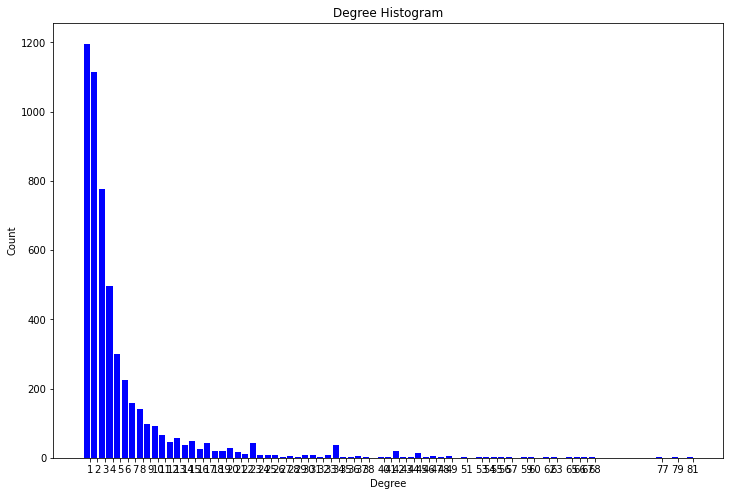

In [4]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

## Evaluating Network Strength

In [4]:
# Calculating Centrality metrics for the Graph
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [5]:
# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(degree_centrality).most_common(10))

{21012: 0.015455065827132226,
 21281: 0.01507345926349933,
 22691: 0.014691852699866437,
 12365: 0.014691852699866437,
 6610: 0.012974623163518412,
 9785: 0.012974623163518412,
 21508: 0.012783819881701965,
 17655: 0.012593016599885518,
 2741: 0.01240221331806907,
 19423: 0.012020606754436176}

In [6]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(closeness_centrality).most_common(10))

{13801: 0.19428463503141283,
 14485: 0.18953808583111678,
 9572: 0.18903821471838708,
 17655: 0.18896237842386998,
 2654: 0.18712852106232164,
 21012: 0.18654622580583352,
 12545: 0.18598852330314233,
 25006: 0.18560115626896184,
 12365: 0.18530908453426106,
 22691: 0.18475874375871945}

In [7]:
# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(eigenvector_centrality).most_common(10))

{21012: 0.15556149399531624,
 2741: 0.15357400608863453,
 12365: 0.15307164040970483,
 21508: 0.15119360119177247,
 9785: 0.15090290411709814,
 15003: 0.1504073721827891,
 25346: 0.1490690006279582,
 7956: 0.14906608299776347,
 14807: 0.1490065679193068,
 12781: 0.1488807727738924}

From above output we observe Node 21012,13801,14485,2741 are most strongest in the network

# Girvan-Newmann Community Detection

In [8]:
%%time
# Using the Girvan-Newman algorithm to create a Communicty Structure
from networkx.algorithms.community.centrality import girvan_newman

Com_girvan=girvan_newman(G)

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 16 µs


In [9]:
%%time
type(Com_girvan)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


generator

In [10]:
%%time
# Creating a dictionary for the community 
com=0
dict={}

# Populating the items of the dictionary
for i in next(Com_girvan):
    list=sorted(i)
    for j in range(len(list)):
        if list[j] in dict:
            print('already found')
        else:
            dict.update({list[j]: com})
        j+=1
    com+=1
    
#values_girvan
values_girvan=[dict.get(node) for node in G.nodes()]


CPU times: user 5min 42s, sys: 2.35 s, total: 5min 44s
Wall time: 6min


Total number of Communities= 356
Modularity: 0.17641819590027658
CPU times: user 2.6 s, sys: 166 ms, total: 2.76 s
Wall time: 2.95 s


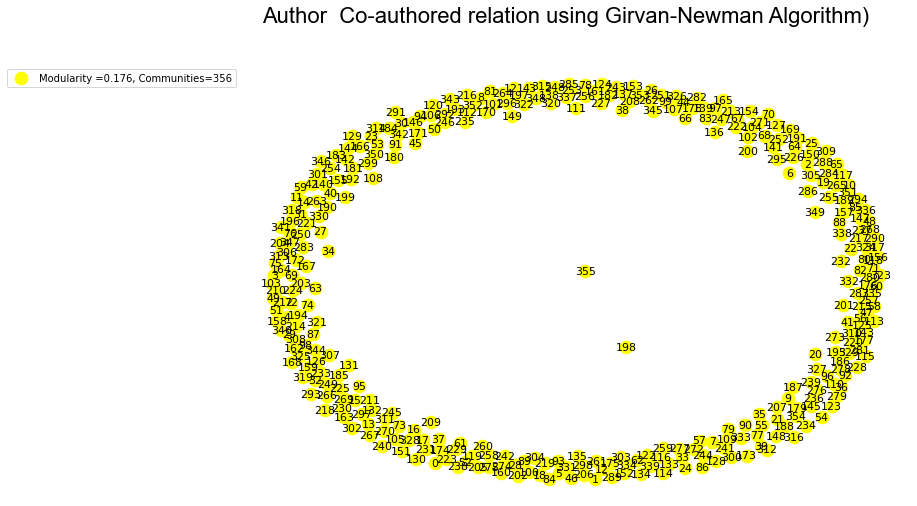

In [12]:
%%time
# Creating a dictionary like 'Community num':'Author Co-author'
dict_girvan={}

for each_item in dict.items():
    comm_num=each_item[1]
    comm_node=each_item[0]
    
    if comm_num in dict_girvan:
        value=dict_girvan.get(comm_num)  + (comm_node)
        dict_girvan.update({comm_num: value})
    else:
        dict_girvan.update({comm_num: comm_node})
        
# Creating the output file
community_girvan=pd.DataFrame.from_dict(dict_girvan, orient='index',columns=['Members'])
community_girvan.index.rename('Community Num', inplace=True)
community_girvan.to_csv('Community_List_girvan.csv')

# Creating a graph where each node represents a community
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_girvan)

# Calculation of number of communities and modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
mod_girv=community.modularity(dict,G)
print("Modularity:", mod_girv)

# Creation of the graph
pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=160,font_size=11, node_color='yellow',
                    label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))

plt.suptitle('Author  Co-authored relation using Girvan-Newman Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('Girvan-Newman.png', dpi=400, bbox_inches='tight')

In [13]:
len(community_girvan)

356

# Louvain Algorithm


In [38]:
%%time
# Initial partition of the graph and running the Louvain algorithm for Community Detection
partition = community.best_partition(G)

values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:Author Co-author}
dict_lou={}

# Populating the dictionary with items
for each_item in partition.items():
    comm_num=each_item[1]
    comm_node=each_item[0]
    if comm_num in dict_lou:
        value=dict_lou.get((comm_num))
        dict_lou.update({comm_num:value})
    else:
        dict_lou.update({comm_num:comm_node})

# Creating a dataframe from the diet, and getting the output into excel
community_lou=pd.DataFrame.from_dict(dict_lou, orient='index',columns=['Members'])
community_lou.index.rename('Community_Num' , inplace=True)
community_lou.to_csv('Community_List_Louvain.csv')

CPU times: user 848 ms, sys: 9.95 ms, total: 858 ms
Wall time: 883 ms


In [39]:
%%time
len(community_lou)

CPU times: user 16 µs, sys: 1 µs, total: 17 µs
Wall time: 20 µs


393

Modularity:  0.8606698403365498
Total number of Communities= 390
CPU times: user 2.75 s, sys: 179 ms, total: 2.93 s
Wall time: 3.05 s


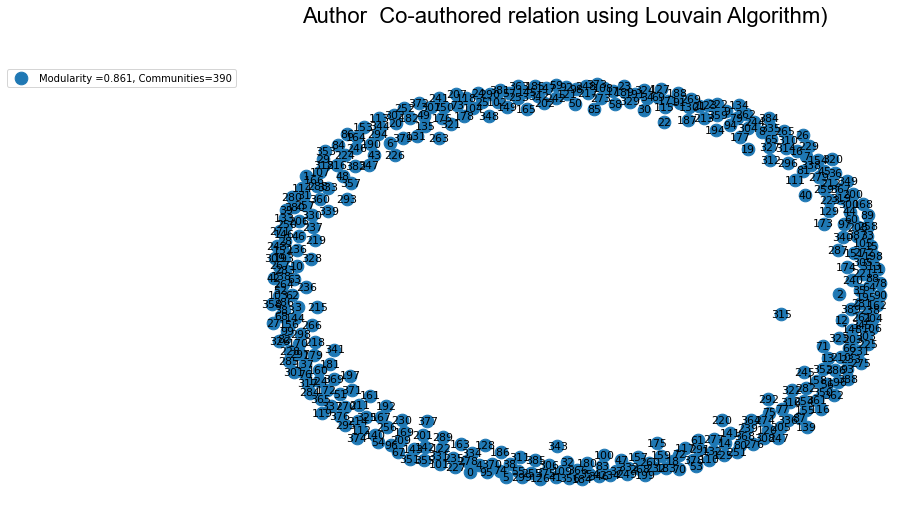

In [17]:
%%time
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the Louvain dictionary created earlier
G_comm.add_nodes_from(dict_lou)

# Calculating modularity and the total number of communities
mod=community.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Author  Co-authored relation using Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

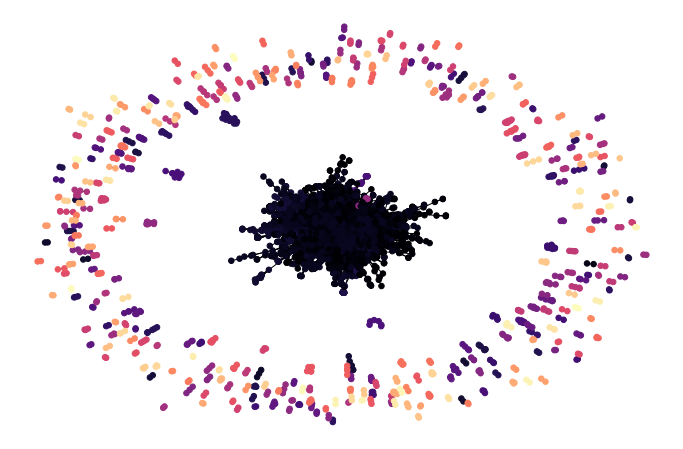

CPU times: user 1.78 s, sys: 30.9 ms, total: 1.81 s
Wall time: 1.88 s


In [18]:
%%time
# Now we try to obtain the color coded graph for each community
lou_algo= nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
plt.show()

## Dendrogram

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [93.75, 93.75, 133.75, 133.75],
  [70.0, 70.0, 113.75, 113.75],
  [24.375, 24.375, 91.875, 91.875],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [215.0, 215.0, 234.375, 234.375],
  [192.5, 192.5, 224.6875, 224.6875],
  [170.0, 170.0, 208.59375, 208.59375],
  [58.125, 58.125, 189.296875, 189.296875],
  [5.0, 5.0, 123.7109375, 123.7109375],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [280

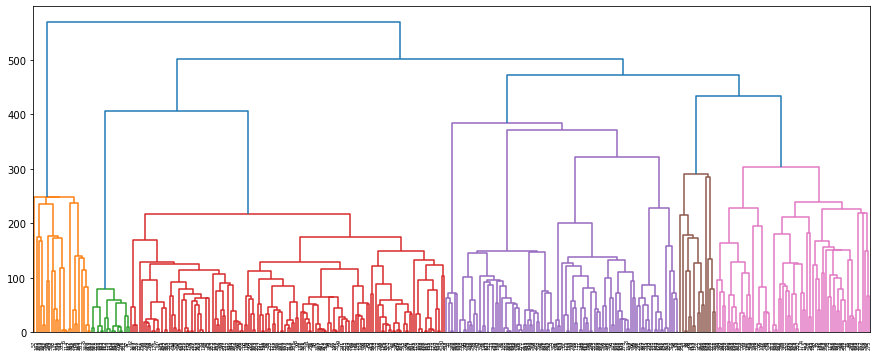

In [21]:
matplotlib.rcParams['figure.figsize']= [15, 6]
Z = linkage(community_lou)

# Ploting dendrogram
dendrogram(Z)

# Fast greedy algorithm

In [22]:
    %%time
    # Count nodes and edges
    N = len(G.nodes())
    m = sum([d.get("weight", 1) for u, v, d in G.edges(data=True)])
    q0 = 1.0 / (2.0 * m)

    # Map node labels to contiguous integers
    label_for_node = {i: v for i, v in enumerate(G.nodes())}
    node_for_label = {label_for_node[i]: i for i in range(N)}

    # Calculate degrees
    k_for_label = G.degree(G.nodes(), weight=None)
    k = [k_for_label[label_for_node[i]] for i in range(N)]

    # Initialize community and merge lists
    communities = {i: frozenset([i]) for i in range(N)}
    merges = []

    # Initial modularity
    partition = [[label_for_node[x] for x in c] for c in communities.values()]
    q_cnm = modularity(G, partition)

    # Initialize data structures
    # CNM Eq 8-9 (Eq 8 was missing a factor of 2 (from A_ij + A_ji)
    # a[i]: fraction of edges within community i
    # dq_dict[i][j]: dQ for merging community i, j
    # dq_heap[i][n] : (-dq, i, j) for communitiy i nth largest dQ
    # H[n]: (-dq, i, j) for community with nth largest max_j(dQ_ij)
    a = [k[i] * q0 for i in range(N)]
    dq_dict = {
        i: {
            j: 2 * q0 - 2 * k[i] * k[j] * q0 * q0
            for j in [node_for_label[u] for u in G.neighbors(label_for_node[i])]
            if j != i
        }
        for i in range(N)
    }
    dq_heap = [
        MappedQueue([(-dq, i, j) for j, dq in dq_dict[i].items()]) for i in range(N)
    ]
    H = MappedQueue([dq_heap[i].h[0] for i in range(N) if len(dq_heap[i]) > 0])

    # Merge communities until we can't improve modularity
    while len(H) > 1:
        # Find best merge
        # Remove from heap of row maxes
        # Ties will be broken by choosing the pair with lowest min community id
        try:
            dq, i, j = H.pop()
        except IndexError:
            break
        dq = -dq
        # Remove best merge from row i heap
        dq_heap[i].pop()
        # Push new row max onto H
        if len(dq_heap[i]) > 0:
            H.push(dq_heap[i].h[0])
        # If this element was also at the root of row j, we need to remove the
        # duplicate entry from H
        if dq_heap[j].h[0] == (-dq, j, i):
            H.remove((-dq, j, i))
            # Remove best merge from row j heap
            dq_heap[j].remove((-dq, j, i))
            # Push new row max onto H
            if len(dq_heap[j]) > 0:
                H.push(dq_heap[j].h[0])
        else:
            # Duplicate wasn't in H, just remove from row j heap
            dq_heap[j].remove((-dq, j, i))
        # Stop when change is non-positive
        if dq <= 0:
            break

        # Perform merge
        communities[j] = (communities[i] | communities[j])
        del communities[i]
        merges.append((i, j, dq))
        # New modularity
        q_cnm += dq
        # Get list of communities connected to merged communities
        i_set = set(dq_dict[i].keys())
        j_set = set(dq_dict[j].keys())
        all_set = (i_set | j_set) - {i, j}
        both_set = i_set & j_set
        # Merge i into j and update dQ
        for k in all_set:
            # Calculate new dq value
            if k in both_set:
                dq_jk = dq_dict[j][k] + dq_dict[i][k]
            elif k in j_set:
                dq_jk = dq_dict[j][k] - 2.0 * a[i] * a[k]
            else:
                # k in i_set
                dq_jk = dq_dict[i][k] - 2.0 * a[j] * a[k]
            # Update rows j and k
            for row, col in [(j, k), (k, j)]:
                # Save old value for finding heap index
                if k in j_set:
                    d_old = (-dq_dict[row][col], row, col)
                else:
                    d_old = None
                # Update dict for j,k only (i is removed below)
                dq_dict[row][col] = dq_jk
                # Save old max of per-row heap
                if len(dq_heap[row]) > 0:
                    d_oldmax = dq_heap[row].h[0]
                else:
                    d_oldmax = None
                # Add/update heaps
                d = (-dq_jk, row, col)
                if d_old is None:
                    # We're creating a new nonzero element, add to heap
                    dq_heap[row].push(d)
                else:
                    # Update existing element in per-row heap
                    dq_heap[row].update(d_old, d)
                # Update heap of row maxes if necessary
                if d_oldmax is None:
                    # No entries previously in this row, push new max
                    H.push(d)
                else:
                    # We've updated an entry in this row, has the max changed?
                    if dq_heap[row].h[0] != d_oldmax:
                        H.update(d_oldmax, dq_heap[row].h[0])

        # Remove row/col i from matrix
        i_neighbors = dq_dict[i].keys()
        for k in i_neighbors:
            # Remove from dict
            dq_old = dq_dict[k][i]
            del dq_dict[k][i]
            # Remove from heaps if we haven't already
            if k != j:
                # Remove both row and column
                for row, col in [(k, i), (i, k)]:
                    # Check if replaced dq is row max
                    d_old = (-dq_old, row, col)
                    if dq_heap[row].h[0] == d_old:
                        # Update per-row heap and heap of row maxes
                        dq_heap[row].remove(d_old)
                        H.remove(d_old)
                        # Update row max
                        if len(dq_heap[row]) > 0:
                            H.push(dq_heap[row].h[0])
                    else:
                        # Only update per-row heap
                        dq_heap[row].remove(d_old)

        del dq_dict[i]
        # Mark row i as deleted, but keep placeholder
        dq_heap[i] = MappedQueue()
        # Merge i into j and update a
        a[j] += a[i]
        a[i] = 0

    communities = [
        ([label_for_node[i] for i in c]) for c in communities.values()
    ]
    com_fg=sorted(communities, key=len, reverse=True)

CPU times: user 8.25 s, sys: 75.9 ms, total: 8.33 s
Wall time: 9.81 s


In [27]:
communities

[[16470, 17822],
 [10115, 10134, 23916],
 [8157, 2120],
 [7713, 19052],
 [8302, 16484],
 [8708, 23776],
 [13621, 25388],
 [21696, 25854, 25940, 284, 6427, 16835, 18677],
 [21191, 2004],
 [8887, 6072],
 [18182, 6804, 12260, 19624, 25491, 25844, 6184],
 [4254, 9337],
 [4685, 15415, 24152, 24640],
 [6709, 18003, 5545],
 [11566, 11808, 18560],
 [15624, 15249],
 [2054, 1552, 8719, 9760, 10355, 13741],
 [6075, 13932, 14499, 20345],
 [5059, 21530, 13485],
 [5413, 18171, 85],
 [9485, 10435, 1044, 21823, 5809, 14698, 8774, 6943, 22748],
 [1194, 21858],
 [4252, 24451, 23856],
 [24961, 10676],
 [2569, 5546],
 [23175, 21206, 25662],
 [70, 4727, 15559, 123, 23240, 3980, 16962],
 [9094, 19061],
 [2119, 7637],
 [9483,
  25250,
  1258,
  12032,
  2852,
  12797,
  25056,
  25827,
  25721,
  21584,
  12599,
  4868,
  17729],
 [5425, 2784, 16109, 16224, 21808, 24161],
 [10081, 3185, 13291, 20547, 20792],
 [19051, 20940, 6039, 6176, 15161, 20949, 22879],
 [2656, 14560, 24251],
 [16703, 13202, 22253, 4128]

In [28]:
%%time
# Modularity
q_cnm 

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


0.8119355078618093

# Overlapping Community: Clique percolation method

In [29]:
%%time
# Defining a circle that can be drawn around each community
def draw_circle(clique,coords):
    dist=0
    temp_dist=0
    center=[0 for i in range(2)]
    color=next(colors)
    for a in clique:
        for b in clique:
            temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
            if temp_dist>dist:
                dist=temp_dist
                for i in range(2):
                    center[i]=(coords[a][i]+coords[b][i])/2
    rad=dist**0.5/2
    cir=plt.Circle((center[0],center[1]),radius=rad*1.3,fill=False,color=color)
    plt.gca().add_patch(cir)
    plt.axis('scaled')
    return color

# Setting a cycle of colors,
global colors, hatches
colors=it.cycle('b')

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


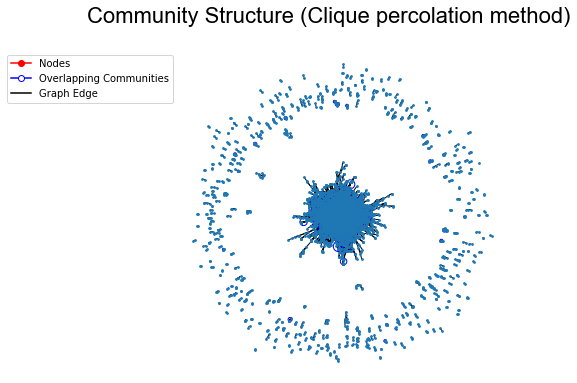

CPU times: user 5.36 s, sys: 84.6 ms, total: 5.44 s
Wall time: 5.71 s


In [31]:
%%time
#Remove "len(clique)>4" 
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>4]

# Draw the graph
nx.draw_networkx(G,pos, node_size=3, with_labels=False)
for clique in cliques:
    nx.draw_networkx_nodes(G,pos,nodelist=clique,node_color=draw_circle(clique,pos),node_size=1000, alpha=0)
plt.suptitle('Community Structure (Clique percolation method)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('Cliques1.png',dpi=400, bbox_inches='tight')
plt.show()

In [33]:
%%time
cliques

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


[[16389, 21379, 16414, 8768, 23038],
 [16389, 21379, 16414, 8768, 11015],
 [16389, 17828, 21281, 3502, 1839, 16881, 23864, 1265, 25910, 15126],
 [16389, 4068, 23038, 8768, 16414],
 [16389, 9937, 8768, 23038, 16414],
 [16393, 17330, 1339, 15580, 20478],
 [26, 4550, 13096, 11801, 13142, 1407],
 [27, 19081, 11114, 25540, 24726],
 [16414, 8768, 21754, 9937, 24270, 23038],
 [16414, 16010, 10096, 25585, 9907],
 [16415, 15682, 7045, 14710, 17157, 23093, 7046],
 [65, 24960, 11609, 23300, 357],
 [16469, 5934, 15066, 17665, 5392, 7541],
 [16469, 5934, 15066, 482, 20424],
 [16469, 5934, 15066, 25378, 10871],
 [16469, 5934, 15066, 6317, 15664],
 [88,
  15244,
  16654,
  17807,
  4755,
  7197,
  15010,
  2338,
  14766,
  18225,
  9656,
  19645,
  6340,
  1995,
  7635,
  12507,
  2530,
  19939,
  2535,
  10350,
  6512,
  7444,
  23712,
  15457,
  20574,
  24718],
 [88,
  15244,
  16654,
  17807,
  4755,
  7197,
  15010,
  2338,
  14766,
  18225,
  9656,
  19645,
  6340,
  1995,
  7635,
  12507,
  25

In [32]:
%%time
len(cliques)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


311

# Normalised F1 communities

<a href="https://www.codecogs.com/eqnedit.php?latex=F1&space;=&space;\frac{2&space;\cdot&space;precision\cdot&space;recall}{precision&plus;&space;recall}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?F1&space;=&space;\frac{2&space;\cdot&space;precision\cdot&space;recall}{precision&plus;&space;recall}" title="F1 = \frac{2 \cdot precision\cdot recall}{precision+ recall}" /></a>

https://github.com/GiulioRossetti/f1-communities

formula of f1


In [191]:
import community as community

G = nx.read_edgelist("data.txt",create_using = nx.Graph())


lp = list(community.best_partition(G,G))
lpcoms = [tuple(x) for x in lp]

kclique = list(community.k_clique_communities(G, 4))
kcoms = [tuple(x) for x in kclique]

# Computing the NF1 scores and statistics
nf = NF1(lpcoms, kcoms)
results = nf.summary()
print(results['scores'])
print(results['details'])

# Visualising the Precision-Recall density scatter-plot
nf.plot()

### The purpose of this post was to provide a quick illustration of how Tribes of Twitter Users who share common interests can be identified along with the influential Users within those Tribes and in the wider community.

TypeError: 'list' object is not callable